In [19]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Join das Bases

In [3]:
censo_escolar = pd.read_csv(r'dados/censo_escolar.csv')
ideb = pd.read_csv(r'dados/ideb.csv')
inse = pd.read_excel(r'dados/INSE_2021_escolas.xlsx')

In [4]:
print(censo_escolar.columns)
censo_escolar.shape

Index(['ano', 'sigla_uf', 'id_municipio', 'id_municipio_nome', 'id_escola',
       'tipo_categoria_escola_privada', 'tipo_localizacao',
       'vinculo_secretaria_educacao', 'vinculo_seguranca_publica',
       'vinculo_secretaria_saude', 'vinculo_outro_orgao',
       'indice_infra_basica', 'indice_infra_pedagogica',
       'indice_infra_esportiva', 'indice_conectividade',
       'indice_acessibilidade', 'profissional_bibliotecario',
       'material_pedagogico_cientifico',
       'quantidade_matricula_educacao_basica', 'quantidade_matricula_infantil',
       'quantidade_matricula_infantil_pre_escola',
       'quantidade_matricula_medio', 'quantidade_matricula_especial',
       'quantidade_docente_educacao_basica', 'quantidade_docente_infantil',
       'quantidade_docente_fundamental', 'quantidade_docente_medio',
       'quantidade_turma_eja', 'quantidade_turma_eja_fundamental',
       'quantidade_turma_eja_medio', 'quantidade_turma_especial',
       'quantidade_turma_especial_comum',
 

(36248, 33)

In [5]:
print(ideb.columns)
ideb.shape

Index(['ano', 'sigla_uf', 'sigla_uf_nome', 'id_municipio', 'id_municipio_nome',
       'id_escola', 'id_escola_nome', 'id_escola_latitude',
       'id_escola_longitude', 'ensino', 'anos_escolares', 'taxa_aprovacao',
       'indicador_rendimento', 'nota_saeb_matematica',
       'nota_saeb_lingua_portuguesa', 'nota_saeb_media_padronizada', 'ideb',
       'projecao'],
      dtype='object')


(131021, 18)

In [6]:
inse.columns = inse.columns.str.lower()

In [7]:
inse

,nu_ano_saeb,co_uf,sg_uf,no_uf,co_municipio,no_municipio,id_escola,no_escola,tp_tipo_rede,tp_localizacao,...,media_inse,inse_classificacao,pc_nivel_1,pc_nivel_2,pc_nivel_3,pc_nivel_4,pc_nivel_5,pc_nivel_6,pc_nivel_7,pc_nivel_8
0,2021,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,3,1,...,4.74,Nível IV,0.00,11.11,0.00,55.56,22.22,11.11,0.00,0.00
1,2021,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,3,2,...,4.84,Nível IV,0.00,11.08,11.15,40.79,22.23,7.34,7.41,0.00
2,2021,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,2,1,...,4.75,Nível IV,1.29,15.01,20.89,27.67,20.03,8.53,5.67,0.91
3,2021,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,3,1,...,4.97,Nível IV,0.00,3.42,14.33,42.99,21.18,14.33,0.00,3.74
4,2021,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,11024968,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,2,1,...,5.13,Nível V,0.00,6.89,15.30,26.20,20.90,16.66,11.76,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69815,2021,53,DF,Distrito Federal,5300108,Brasília,53068190,EC 01 DO PORTO RICO,2,1,...,5.09,Nível V,0.00,4.85,14.02,29.80,26.59,13.96,10.78,0.00
69816,2021,53,DF,Distrito Federal,5300108,Brasília,53068203,EC 02 DO ITAPOA,2,1,...,4.92,Nível IV,0.00,10.70,17.11,26.26,26.63,11.73,6.03,1.54
69817,2021,53,DF,Distrito Federal,5300108,Brasília,53068211,CEF MIGUEL ARCANJO,2,1,...,5.20,Nível V,0.00,3.26,11.58,27.84,28.23,15.41,11.85,1.83
69818,2021,53,DF,Distrito Federal,5300108,Brasília,53068220,EC DOM BOSCO,2,1,...,5.03,Nível V,1.03,5.28,19.62,21.37,27.02,11.32,14.35,0.00


In [8]:
df_temp = pd.merge(censo_escolar, ideb, on='id_escola', how='inner')
df = pd.merge(df_temp, inse, on='id_escola', how='inner')
df

,ano_x,sigla_uf_x,id_municipio_x,id_municipio_nome_x,id_escola,tipo_categoria_escola_privada,tipo_localizacao,vinculo_secretaria_educacao,vinculo_seguranca_publica,vinculo_secretaria_saude,...,media_inse,inse_classificacao,pc_nivel_1,pc_nivel_2,pc_nivel_3,pc_nivel_4,pc_nivel_5,pc_nivel_6,pc_nivel_7,pc_nivel_8
0,2021,AL,2704401,Major Isidoro,27010236,NaN,Rural,1.0,0.0,0.0,...,3.91,Nível II,10.85,35.71,39.15,7.14,7.14,0.00,0.00,0.00
1,2021,AL,2704401,Major Isidoro,27010236,NaN,Rural,1.0,0.0,0.0,...,3.91,Nível II,10.85,35.71,39.15,7.14,7.14,0.00,0.00,0.00
2,2021,AL,2704401,Major Isidoro,27010147,NaN,Rural,1.0,0.0,0.0,...,4.06,Nível III,0.00,43.89,35.29,11.92,8.90,0.00,0.00,0.00
3,2021,AL,2704401,Major Isidoro,27010147,NaN,Rural,1.0,0.0,0.0,...,4.06,Nível III,0.00,43.89,35.29,11.92,8.90,0.00,0.00,0.00
4,2021,AL,2708303,São José da Laje,27238202,NaN,Urbana,1.0,0.0,0.0,...,4.30,Nível III,1.43,34.65,28.57,19.82,6.25,6.25,3.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52246,2021,PB,2503704,Cajazeiras,25106139,NaN,Urbana,1.0,0.0,0.0,...,4.42,Nível III,4.90,19.10,26.13,35.48,11.87,0.00,2.52,0.00
52247,2021,PB,2503704,Cajazeiras,25106139,NaN,Urbana,1.0,0.0,0.0,...,4.42,Nível III,4.90,19.10,26.13,35.48,11.87,0.00,2.52,0.00
52248,2021,PA,1501402,Belém,15140759,NaN,Urbana,1.0,0.0,0.0,...,4.40,Nível III,1.58,29.17,25.91,23.84,12.35,4.75,2.01,0.39
52249,2021,PA,1501402,Belém,15140759,NaN,Urbana,1.0,0.0,0.0,...,4.40,Nível III,1.58,29.17,25.91,23.84,12.35,4.75,2.01,0.39


In [9]:
df.isnull().sum()

ano_x                  0
sigla_uf_x             0
id_municipio_x         0
id_municipio_nome_x    0
id_escola              0
                      ..
pc_nivel_4             0
pc_nivel_5             0
pc_nivel_6             0
pc_nivel_7             0
pc_nivel_8             0
Length: 71, dtype: int64

In [10]:
df['tipo_categoria_escola_privada'].unique()
df.drop(columns=['tipo_categoria_escola_privada'], inplace=True)

In [11]:
print(df.shape)
df.head()

(52251, 70)


,ano_x,sigla_uf_x,id_municipio_x,id_municipio_nome_x,id_escola,tipo_localizacao,vinculo_secretaria_educacao,vinculo_seguranca_publica,vinculo_secretaria_saude,vinculo_outro_orgao,...,media_inse,inse_classificacao,pc_nivel_1,pc_nivel_2,pc_nivel_3,pc_nivel_4,pc_nivel_5,pc_nivel_6,pc_nivel_7,pc_nivel_8
0,2021,AL,2704401,Major Isidoro,27010236,Rural,1.0,0.0,0.0,0.0,...,3.91,Nível II,10.85,35.71,39.15,7.14,7.14,0.00,0.00,0.0
1,2021,AL,2704401,Major Isidoro,27010236,Rural,1.0,0.0,0.0,0.0,...,3.91,Nível II,10.85,35.71,39.15,7.14,7.14,0.00,0.00,0.0
2,2021,AL,2704401,Major Isidoro,27010147,Rural,1.0,0.0,0.0,0.0,...,4.06,Nível III,0.00,43.89,35.29,11.92,8.90,0.00,0.00,0.0
3,2021,AL,2704401,Major Isidoro,27010147,Rural,1.0,0.0,0.0,0.0,...,4.06,Nível III,0.00,43.89,35.29,11.92,8.90,0.00,0.00,0.0
4,2021,AL,2708303,São José da Laje,27238202,Urbana,1.0,0.0,0.0,0.0,...,4.30,Nível III,1.43,34.65,28.57,19.82,6.25,6.25,3.04,0.0


In [12]:
df_fundamental = df[df['anos_escolares'] == 'fianis (6-9)'].copy()

In [13]:
df.columns

Index(['ano_x', 'sigla_uf_x', 'id_municipio_x', 'id_municipio_nome_x',
       'id_escola', 'tipo_localizacao', 'vinculo_secretaria_educacao',
       'vinculo_seguranca_publica', 'vinculo_secretaria_saude',
       'vinculo_outro_orgao', 'indice_infra_basica', 'indice_infra_pedagogica',
       'indice_infra_esportiva', 'indice_conectividade',
       'indice_acessibilidade', 'profissional_bibliotecario',
       'material_pedagogico_cientifico',
       'quantidade_matricula_educacao_basica', 'quantidade_matricula_infantil',
       'quantidade_matricula_infantil_pre_escola',
       'quantidade_matricula_medio', 'quantidade_matricula_especial',
       'quantidade_docente_educacao_basica', 'quantidade_docente_infantil',
       'quantidade_docente_fundamental', 'quantidade_docente_medio',
       'quantidade_turma_eja', 'quantidade_turma_eja_fundamental',
       'quantidade_turma_eja_medio', 'quantidade_turma_especial',
       'quantidade_turma_especial_comum', 'quantidade_fundamental_anos_fina

In [14]:
df.to_csv(r'dados/dataset_final.csv', index=False)

In [15]:
df_master = pd.read_csv(r'dados/dataset_final.csv')

In [16]:
df_fundamental = df_master[(df_master['anos_escolares'] == 'finais (6-9)') & (df_master['quantidade_fundamental_anos_finais'] > 0)].copy()

colunas_essencias = ['ideb', 'media_inse']
df_fundamental = df_fundamental.dropna(subset=colunas_essencias)

In [17]:
df_medios = df_master[(df_master['ensino'] == 'medio') & (df_master['quantidade_matricula_medio'] > 0)].copy()
df_medios = df_medios.dropna(subset=colunas_essencias)

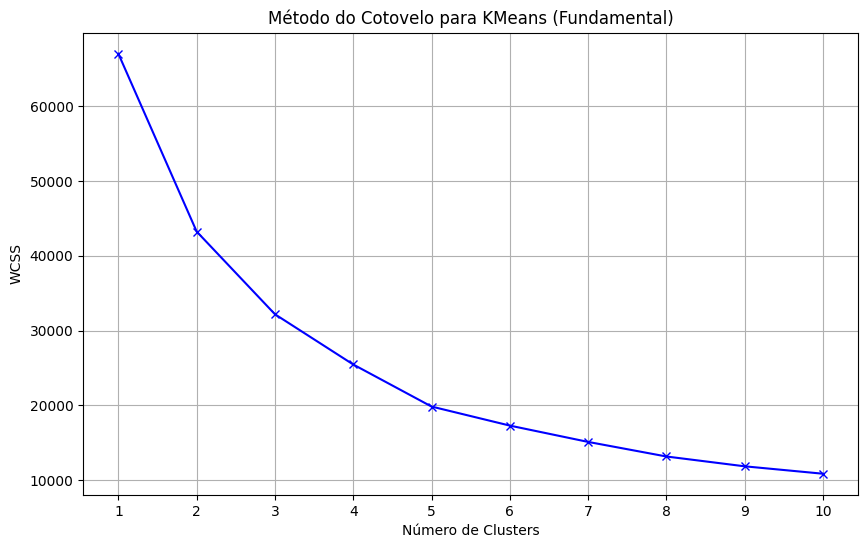

In [21]:
features = ['ideb', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'taxa_aprovacao']

coluna_analise = 'vinculo_seguranca_publica'
graficos_gerados = []

df_fund = df_master[df_master['ensino'] == 'fundamental'].copy()
df_fund = df_fund.dropna(subset=features + [coluna_analise])

if len(df_fund) > 10:
    X_fund = df_fund[features]
    scaler_fund = StandardScaler()
    X_fund_scaled = scaler_fund.fit_transform(X_fund)

    wcss_fund = []
    for i in range(1, 11):
        kmeans_fund = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans_fund.fit(X_fund_scaled)
        wcss_fund.append(kmeans_fund.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss_fund, 'bx-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.title('Método do Cotovelo para KMeans (Fundamental)')
    plt.grid(True)
    plt.xticks(range(1, 11))
    graficos_gerados.append(plt)
    plt.show()
else:
    print(f"Nenhum gráfico gerado para ensino fundamental devido ao número insuficiente de dados: {len(df_fund)} registros encontrados.")

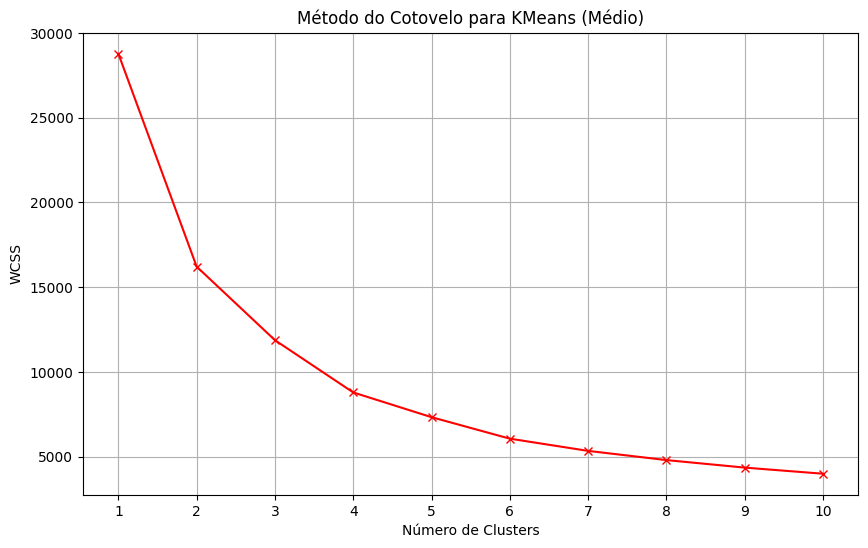

In [23]:
df_med = df_master[df_master['ensino'] == 'medio'].copy()
df_med = df_med.dropna(subset=features + [coluna_analise])

if len(df_med) > 10:
    X_med = df_med[features]
    scaler_med = StandardScaler()
    X_med_scaled = scaler_med.fit_transform(X_med)

    wcss_med = []
    for i in range(1, 11):
        kmeans_med = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans_med.fit(X_med_scaled)
        wcss_med.append(kmeans_med.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss_med, 'rx-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.title('Método do Cotovelo para KMeans (Médio)')
    plt.grid(True)
    plt.xticks(range(1, 11))
    graficos_gerados.append(plt)
    plt.show()
else:
    print(f"Nenhum gráfico gerado para ensino médio devido ao número insuficiente de dados: {len(df_med)} registros encontrados.")

Perfil dos Cluster (Ensino Fundamental):
                      ideb  nota_saeb_matematica  nota_saeb_lingua_portuguesa  \
cluster                                                                         
Alto Desempenho   5.531919            260.785741                   259.683026   
Baixo Desempenho  4.964533            208.937004                   202.925212   
Médio Desempenho  4.163762            235.008071                   235.577927   

                  taxa_aprovacao  vinculo_seguranca_publica  
cluster                                                      
Alto Desempenho        98.703356                   0.016227  
Baixo Desempenho       98.803230                   0.001160  
Médio Desempenho       87.892728                   0.004808  
Comparação Militares (1.0) vs Demais (0.0) por Cluster (Ensino Fundamental):
Tipo_Escola       Demais  Militares
cluster                            
Alto Desempenho     9761        161
Baixo Desempenho    5165          6
Médio Desempenho    16

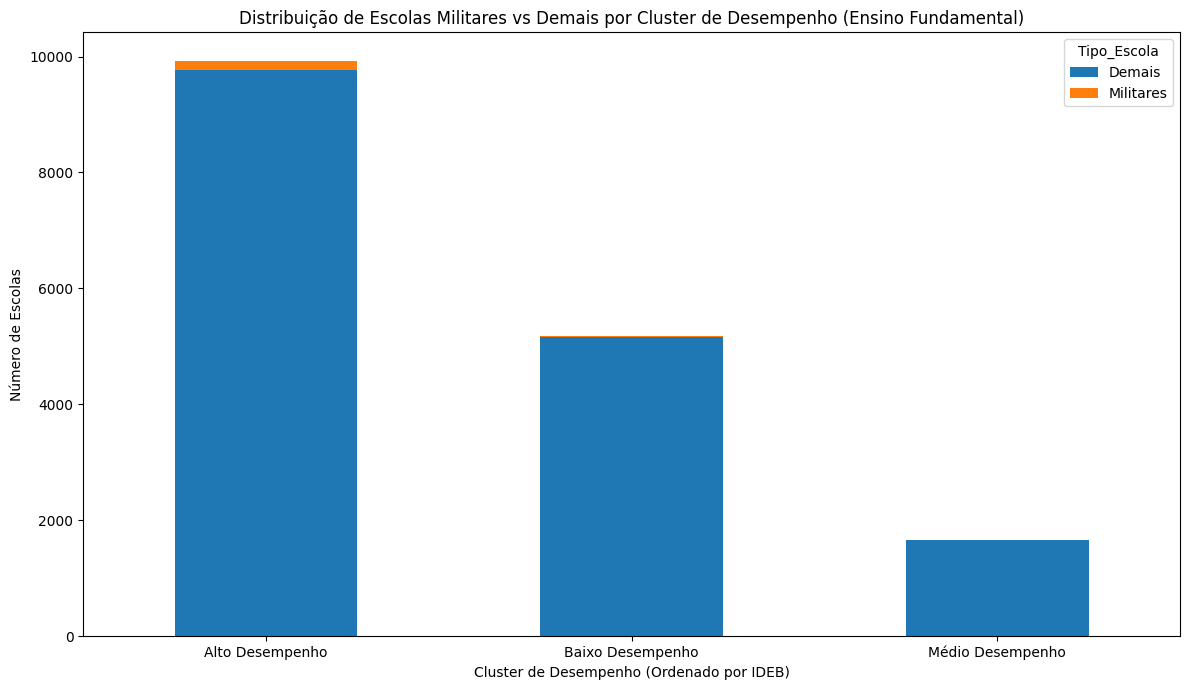

In [27]:
k_fundamental = 3
k_medio = 3

if len(df_fund) > k_fundamental:
    kmeans_fund_final = KMeans(n_clusters=k_fundamental, n_init=10, random_state=42)
    df_fund['cluster'] = kmeans_fund_final.fit_predict(X_fund_scaled)
    df_fund['cluster'] = df_fund['cluster'].map({2: 'Alto Desempenho', 0: 'Médio Desempenho', 1: 'Baixo Desempenho'})
    print("Perfil dos Cluster (Ensino Fundamental):")

    perfil_fund = df_fund.groupby('cluster')[features + [coluna_analise]].mean().sort_values(by='ideb', ascending=False)
    print(perfil_fund)

    print('Comparação Militares (1.0) vs Demais (0.0) por Cluster (Ensino Fundamental):')
    df_fund['Tipo_Escola'] = df_fund[coluna_analise].map({0.0: 'Demais', 1.0: 'Militares'})

    comparacao_fund = df_fund.groupby(['cluster', 'Tipo_Escola']).size().unstack(fill_value=0)
    print(comparacao_fund)

    comparacao_fund_sorted = comparacao_fund.reindex(perfil_fund.index)

    ax = comparacao_fund_sorted.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 7),
        title='Distribuição de Escolas Militares vs Demais por Cluster de Desempenho (Ensino Fundamental)'
    )
    ax.set_ylabel('Número de Escolas')
    ax.set_xlabel('Cluster de Desempenho (Ordenado por IDEB)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('comparacao_cluster_fundamental.png')
    graficos_gerados.append('comparacao_cluster_fundamental.png')
    print("\nGráfico 'comparacao_cluster_fundamental.png' salvo.")   


--- Perfil dos Clusters (Ensino Médio) ---
                      ideb  nota_saeb_matematica  nota_saeb_lingua_portuguesa  \
cluster                                                                         
Médio Desempenho  5.140227            295.050525                   297.357268   
Baixo Desempenho  4.178336            259.346737                   264.731390   
Alto Desempenho   3.474272            250.396922                   257.439078   

                  taxa_aprovacao  
cluster                           
Médio Desempenho       97.215048  
Baixo Desempenho       97.363699  
Alto Desempenho        85.905631  

--- Comparação: Militares (1.0) vs. Demais (0.0) por Cluster (Médio) ---
Tipo_Escola       Demais Escolas  Escolas Militares
cluster                                            
Alto Desempenho             1027                  3
Baixo Desempenho            3767                 18
Médio Desempenho            2286                 93

Gráfico 'comparacao_cluster_medio.png' s

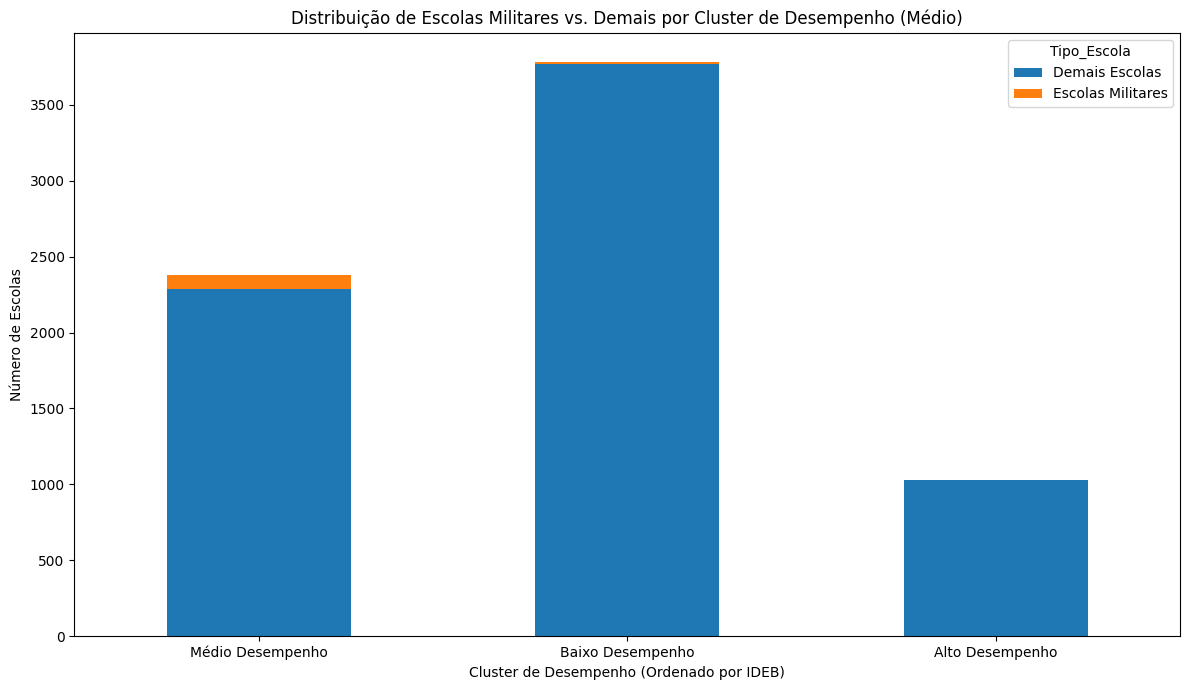

In [29]:
if len(df_medios) > k_medio:
    kmeans_med = KMeans(n_clusters=k_medio, n_init=10, random_state=42)
    df_medios['cluster'] = kmeans_med.fit_predict(X_med_scaled)
    df_medios['cluster'] = df_medios['cluster'].map({2: 'Alto Desempenho', 0: 'Médio Desempenho', 1: 'Baixo Desempenho'})


    print("\n--- Perfil dos Clusters (Ensino Médio) ---")
    perfil_med = df_medios.groupby('cluster')[features].mean().sort_values(by='ideb', ascending=False)
    print(perfil_med)

    print(f"\n--- Comparação: Militares (1.0) vs. Demais (0.0) por Cluster (Médio) ---")
    df_medios['Tipo_Escola'] = df_medios[coluna_analise].map({0.0: 'Demais Escolas', 1.0: 'Escolas Militares'})

    comparacao_med = df_medios.groupby(['cluster', 'Tipo_Escola']).size().unstack(fill_value=0)
    print(comparacao_med)


    comparacao_med_sorted = comparacao_med.reindex(perfil_med.index)

    ax = comparacao_med_sorted.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 7),
        title='Distribuição de Escolas Militares vs. Demais por Cluster de Desempenho (Médio)'
    )
    ax.set_ylabel('Número de Escolas')
    ax.set_xlabel('Cluster de Desempenho (Ordenado por IDEB)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('comparacao_cluster_medio.png')
    graficos_gerados.append('comparacao_cluster_medio.png')
    print("\nGráfico 'comparacao_cluster_medio.png' salvo.")